In [1]:
import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Handling large CSVs

Since the input for this data `(data.csv)` is an extremely large CSV file `(1.9 GB)`, I'm going to randomly sample 1 million samples out of it for the purpose of this kernel.

In [3]:
import subprocess
#from https://stackoverflow.com/questions/845058/how-to-get-line-count-cheaply-in-python , Olafur's answer
def file_len(fname):
    p = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        raise IOError(err)
    return int(result.strip().split()[0])

lines = file_len('data/chicago-divvy-bicycle-sharing-data/data.csv')
print('Number of lines in "train.csv" is:', lines)

Number of lines in "train.csv" is: 9495236


In [4]:
skiplines = np.random.choice(np.arange(1, lines), size=lines-1-1000000, replace=False)
skiplines=np.sort(skiplines)
print('lines to skip:', len(skiplines))

data = pd.read_csv("data/chicago-divvy-bicycle-sharing-data/data.csv", skiprows=skiplines)

lines to skip: 8495235


In [5]:
data.sample(5)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
774399,14158920,2017,5,21,3,18,Subscriber,Male,2017-05-25 18:38:46,2017-05-25 18:42:23,...,133,Kingsbury St & Kinzie St,41.889177,-87.638506,27.0,74,Kingsbury St & Erie St,41.893882,-87.641711,23.0
508321,10079037,2016,6,24,0,17,Subscriber,Male,2016-06-13 17:27:00,2016-06-13 17:34:00,...,117,Wilton Ave & Belmont Ave,41.940180,-87.653040,23.0,230,Lincoln Ave & Roscoe St,41.943340,-87.670970,19.0
919679,15176923,2017,7,28,6,11,Subscriber,Male,2017-07-16 11:09:31,2017-07-16 11:19:19,...,159,Claremont Ave & Hirsch St,41.907781,-87.685854,11.0,128,Damen Ave & Chicago Ave,41.895769,-87.677220,19.0
702229,13344324,2017,3,9,4,13,Subscriber,Male,2017-03-03 13:19:11,2017-03-03 13:32:52,...,604,Sheridan Rd & Noyes St (NU),42.058239,-87.677432,15.0,605,University Library (NU),42.052939,-87.673447,15.0
953159,17356248,2017,11,48,1,14,Subscriber,Male,2017-11-28 14:26:00,2017-11-28 14:40:00,...,44,State St & Randolph St,41.884730,-87.627734,27.0,88,Racine Ave & Randolph St,41.884069,-87.656853,19.0


In [6]:
data.isnull().sum(0)

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

In [7]:
num_to_month={
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"June",
    7:"July",
    8:"Aug",
    9:"Sept",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}
data['month'] = data.month.apply(lambda x: num_to_month[x])

**It seems there are no missing values in our randomly sampled population!**

## Ridership Over the last few Years

We can observe an increasing trend!

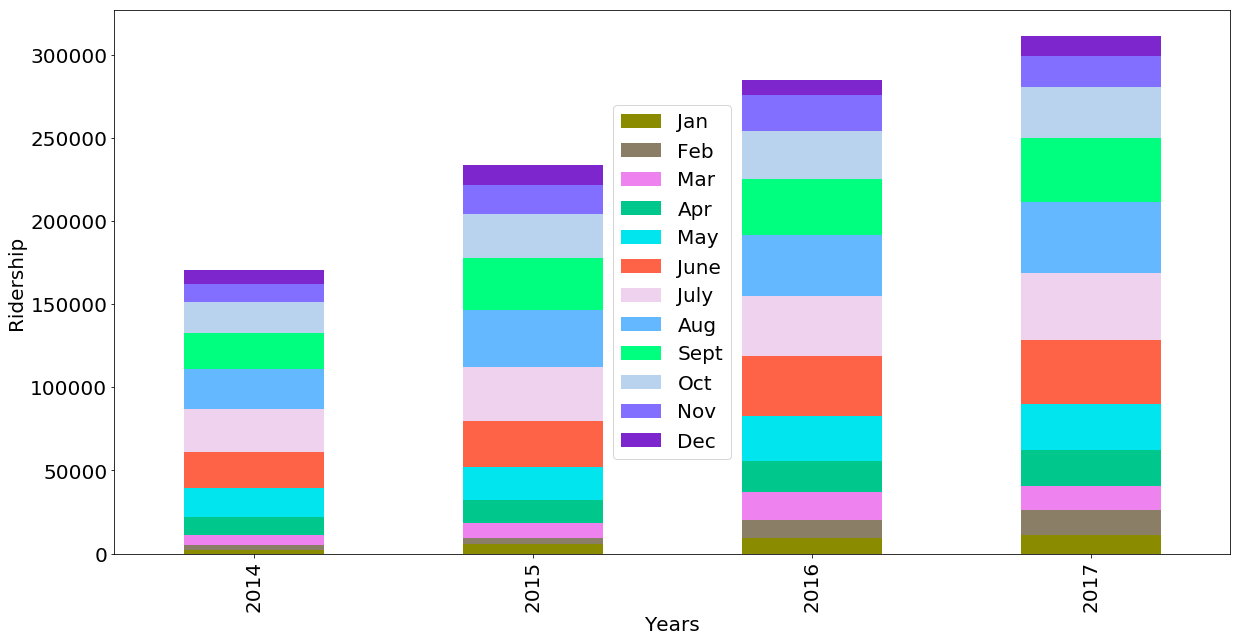

In [8]:
pivot = data.pivot_table(index='year', columns='month', values='day', aggfunc=len)
colors = ["#8B8B00", "#8B7E66", "#EE82EE", "#00C78C", 
          "#00E5EE", "#FF6347", "#EED2EE", 
          "#63B8FF", "#00FF7F", "#B9D3EE", 
          "#836FFF", "#7D26CD"]
pivot.loc[:,['Jan','Feb', 'Mar',
            'Apr','May','June',
            'July','Aug','Sept',
            'Oct','Nov','Dec']].plot.bar(stacked=True, figsize=(20,10), color=colors)
plt.xlabel("Years")
plt.ylabel("Ridership")
plt.legend(loc=10)
plt.show()

Apart from a gradually increasing tred, during peak months of **June, July, Aug & Sept** ridership seems to be significantly higher than in Holiday months of **Dec & Jan**.

Text(0.5,1,'Type of Customers')

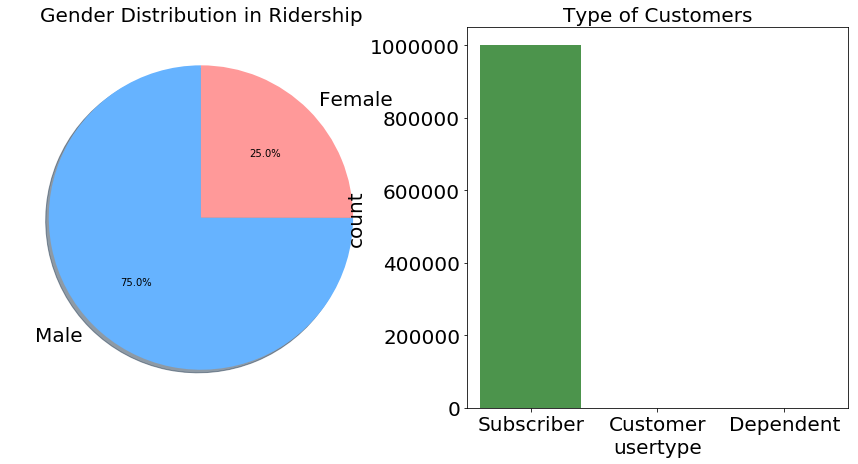

In [9]:
f, ax = plt.subplots(1,2, figsize=(15,7))
colors = ['#66b3ff','#ff9999']
pie = ax[0].pie(list(data['gender'].value_counts()), 
                   labels=list(data.gender.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
count = sns.countplot(x='usertype', data=data, ax=ax[1], color='g', alpha=0.75)
ax[0].set_title("Gender Distribution in Ridership")
ax[1].set_title("Type of Customers")

In [10]:
data.usertype.value_counts()

Subscriber    999877
Customer         109
Dependent         14
Name: usertype, dtype: int64

As it turns out, there are extremely low number of **Customer** or **Dependet** type of riders. It seems most of the riders **prefer annual membership**.

Text(0.5,29.8,'Trip Duration')

<Figure size 1440x720 with 0 Axes>

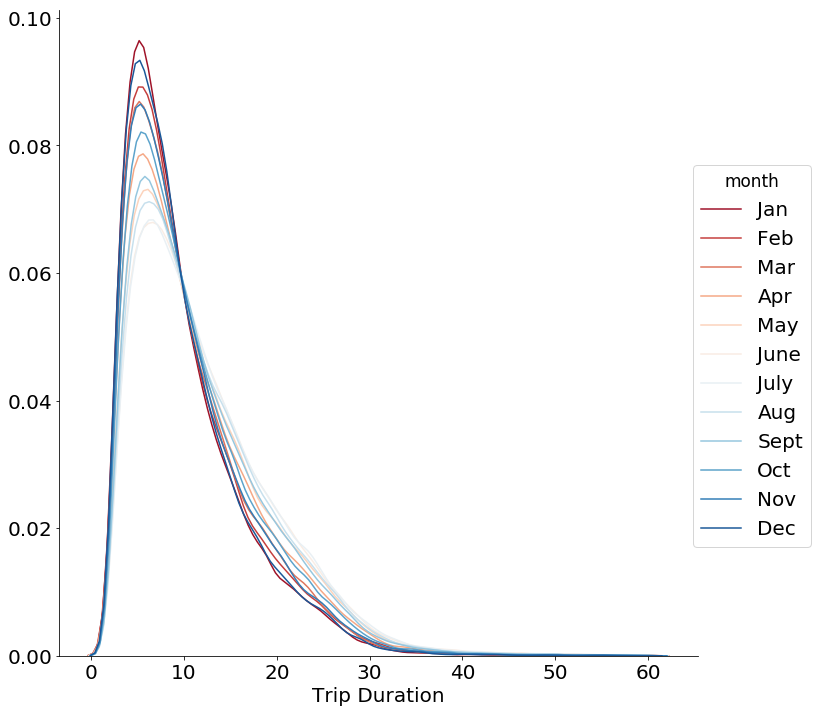

In [11]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(data, hue='month', size=10, hue_order=['Jan','Feb', 'Mar',
            'Apr','May','June',
            'July','Aug','Sept',
            'Oct','Nov','Dec'], palette="RdBu")
g.map(sns.kdeplot, "tripduration")
g.add_legend()
plt.xlabel("Trip Duration")

In [15]:
station_info = data[['from_station_name','latitude_start','longitude_start']].drop_duplicates(subset='from_station_name')

In [17]:
station_info.sample(5)

,from_station_name,latitude_start,longitude_start
62148,MLK Jr Dr & Oakwood Blvd,41.822560,-87.616150
764,Damen Ave & Chicago Ave,41.895769,-87.677220
614,Ada St & Washington Blvd,41.882830,-87.661206
817583,Albany Ave & Montrose Ave,41.961041,-87.705866
531135,Cuyler Ave & Augusta St,41.898168,-87.783055


In [23]:
lat_list = list(station_info.latitude_start)
lat_list = [str(i) for i in lat_list]
lon_list = list(station_info.longitude_start)
lon_list = [str(i) for i in lon_list]
names = list(station_info.from_station_name)

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1Ijoic29taW53IiwiYSI6ImNqaXNrNG83eTE1bXMza3A2Nzg3anRycWsifQ.IQUXPwUjQARUGM8XjS5wmQ'

data = [
    go.Scattermapbox(
        lat= lat_list,
        lon= lon_list,
        mode='markers',
        marker=dict(
            size=9,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=names,
    )
]

layout = go.Layout(
    title = "Bicycle Sharing Stations in Chicago",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.88,
            lon=-87.62
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Chicago Cycle Sharing Stations')